In [1]:
import pandas as pd
import numpy as np

In [2]:
#nạp dữ liệu
df=pd.read_csv('dulieuxettuyendaihoc.csv',encoding='utf-8',header=0,delimiter=',')

In [4]:
#Xuất cột T1 T2 T3
df[['T1','T2','T3']]

,T1,T2,T3
0,7.2,8.4,7.4
1,5.4,6.3,4.3
2,5.6,5.0,2.8
3,6.6,5.1,5.9
4,6.0,5.4,7.6
...,...,...,...
95,8.6,8.9,7.7
96,3.7,4.1,3.1
97,8.8,9.5,9.5
98,2.7,2.8,6.2



Dựa vào điểm thi năm nay 2921 - giả ta có Trường đại học IUH, cần tuyển những học sinh có
điểm thi sao cho phù hợp
với nhu cầu đào tạo của trường.
Trường IUH thấy rằng ban tuyển sinh ưu tiên DH3 tốt và DH1 vừa vừa Hãy đưa ra khuyến nghị đề xuất các nhóm học sinh có kết quả phù hợp

In [5]:
#Gom cụm --> Kmeans --> Basement
from sklearn.cluster import KMeans
#Dữ liệu đầu vào
data=df[['T1','T2','T3']]
#Phân 4 cụm
kmeans=KMeans(n_clusters=4).fit(data)

In [6]:
print(kmeans.cluster_centers_)
print(kmeans.labels_[:])

[[3.21538462 4.13846154 4.92307692]
 [5.68529412 6.31176471 6.89117647]
 [7.74       8.12333333 7.81666667]
 [5.53478261 5.44782609 4.58695652]]
[2 3 3 3 1 2 0 2 1 2 1 2 1 3 2 0 2 3 3 2 1 1 3 1 0 0 3 3 1 1 2 0 1 1 3 1 2
 0 0 1 1 2 2 1 2 3 1 2 2 2 1 1 1 3 1 2 1 2 2 0 1 2 1 2 2 0 3 1 2 3 1 0 3 3
 3 3 1 1 3 3 2 3 1 1 2 2 3 1 1 3 2 2 1 1 1 2 0 2 0 0]


In [7]:
#Tạo nhóm
df['Group']=kmeans.labels_[:]
df[['T1','T2','T3','Group']]

,T1,T2,T3,Group
0,7.2,8.4,7.4,2
1,5.4,6.3,4.3,3
2,5.6,5.0,2.8,3
3,6.6,5.1,5.9,3
4,6.0,5.4,7.6,1
...,...,...,...,...
95,8.6,8.9,7.7,2
96,3.7,4.1,3.1,0
97,8.8,9.5,9.5,2
98,2.7,2.8,6.2,0


Trực quan biểu đồ

In [8]:
data_analysis=df[['T1','T2','T3','Group']]

Count


<Axes: xlabel='Group'>

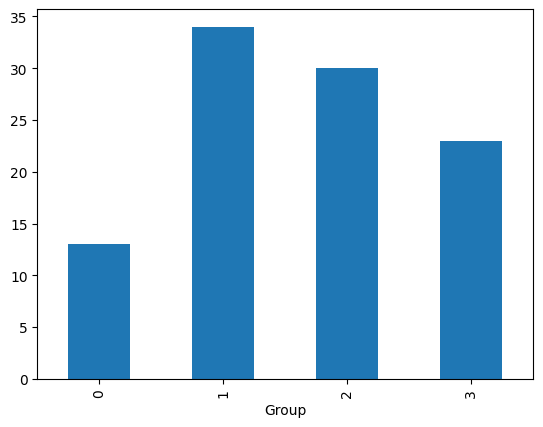

In [9]:
print('Count')
gr_count=data_analysis.groupby(['Group']).size()
gr_count.plot.bar()

Min


<Axes: xlabel='Group'>

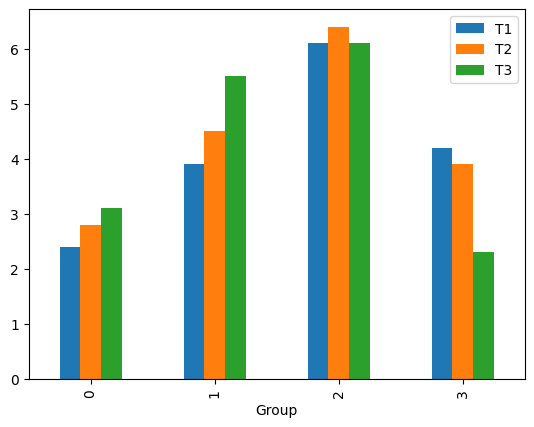

In [10]:
print('Min')
gr_min=data_analysis.groupby(['Group'])[['T1','T2','T3']].min()
gr_min.plot(kind='bar')

Max


<Axes: xlabel='Group'>

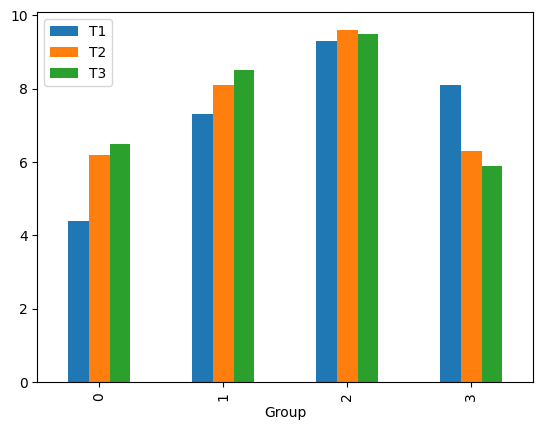

In [11]:
print('Max')
gr_max=data_analysis.groupby(['Group'])[['T1','T2','T3']].max()
gr_max.plot(kind='bar')

Mean


<Axes: xlabel='Group'>

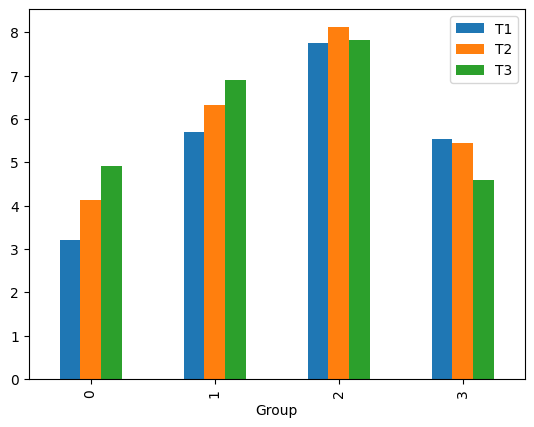

In [12]:
print('Mean')
gr_mean=data_analysis.groupby(['Group'])[['T1','T2','T3']].mean()
gr_mean.plot(kind='bar')

Std


<Axes: xlabel='Group'>

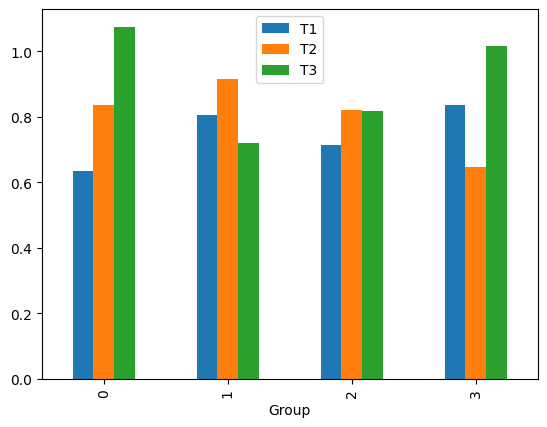

In [13]:
print('Std')
gr_std=data_analysis.groupby(['Group'])[['T1','T2','T3']].std()
gr_std.plot(kind='bar')

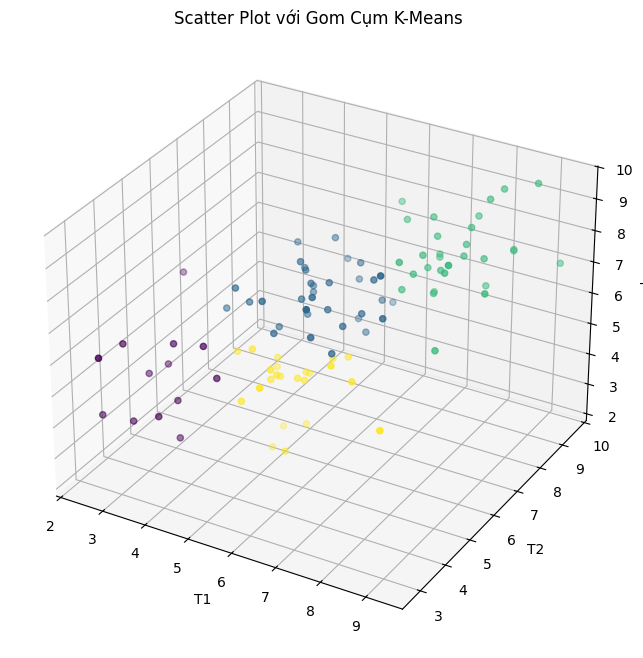

In [14]:
import matplotlib.pyplot as plt
# Vẽ biểu đồ scatter plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Vẽ các điểm trong không gian 3 chiều
ax.scatter(df['T1'], df['T2'], df['T3'], c=df['Group'], cmap='viridis')
# Thêm tiêu đề và nhãn trục
ax.set_title('Scatter Plot với Gom Cụm K-Means')
ax.set_xlabel('T1')
ax.set_ylabel('T2')
ax.set_zlabel('T3')
# Hiển thị biểu đồ
plt.show()